# Business Problem Understanding

**Context**

Perusahaan X menjalankan bisnis di bidang E-Commerce, di mana pembeli dan penjual dapat melakukan transaksi jual beli melalui platform online mereka. Perusahaan X memperoleh pendapatan dari setiap transaksi yang dilakukan oleh pelanggan di situs web mereka. Oleh karena itu, pertumbuhan jumlah pelanggan sangat penting bagi peningkatan keuntungan perusahaan.

Selama beberapa tahun terakhir, perusahaan X mengalami pertumbuhan pelanggan yang cukup signifikan. Namun, data terbaru menunjukkan adanya peningkatan jumlah pelanggan yang melakukan churn. Fenomena ini menjadi tantangan bagi perusahaan dalam mempertahankan pertumbuhan keuntungan.

Terdapat dua strategi utama yang dapat diambil perusahaan untuk menjaga keberlanjutan pendapatan:

- Mempertahankan pelanggan lama agar terus menggunakan platform (customer retention)
- Mengakuisisi pelanggan baru (customer acquisition)

Berikut beberapa hasil riset statistik pemasaran akuisisi & retensi pelanggan sebagai bahan pertimbangan :
- Mendapatkan pelanggan baru dapat menelan biaya lima kali lipat daripada mempertahankan pelanggan yang sudah ada.
- Meningkatkan retensi pelanggan sebesar 5% dapat meningkatkan laba sebesar 25-95%.
- Tingkat keberhasilan penjualan kepada pelanggan yang sudah ada adalah 60-70 %, sedangkan tingkat keberhasilan penjualan kepada pelanggan baru adalah 5-20%.
- Salah satu agen pengalaman pelanggan menemukan bahwa pelanggan setia memiliki kemungkinan 5x lebih besar untuk melakukan pembelian ulang, 5x lebih besar untuk memaafkan, 4x lebih besar untuk merekomendasikan, dan 7x lebih besar untuk mencoba penawaran baru.
- Perusahaan-perusahaan AS kehilangan $136,8 miliar per tahun akibat peralihan konsumen yang dapat dihindari.
- American Express menemukan 33% pelanggan akan mempertimbangkan untuk berpindah perusahaan setelah hanya satu contoh layanan pelanggan yang buruk.

Oleh karena itu, fokus perusahaan harus lebih diarahkan pada retensi pelanggan. Memastikan bahwa pelanggan lama tetap menggunakan platform akan lebih efisien daripada harus terus mencari pelanggan baru. Perusahaan perlu mengembangkan strategi untuk memprediksi pelanggan yang berpotensi churn dan memberikan perlakuan khusus agar mereka tetap loyal terhadap platform.

Sumber : https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/

**Problem Statement :**

Salah satu tantangan utama bagi bisnis E-Commerce adalah mempertahankan pelanggan agar tetap setia dan terus bertransaksi. Perusahaan menghadapi penurunan jumlah pelanggan karena churn, yang menyebabkan pertumbuhan keuntungan menjadi stagnan atau bahkan menurun.


**Goals :**

Berdasarkan masalah yang ada, perusahaan perlu memprediksi pelanggan yang berpotensi untuk churn dan memberikan penanganan yang tepat agar mereka tetap setia. Dengan begitu, perusahaan dapat mempertahankan pendapatan yang telah diperoleh. Selain itu, perusahaan juga bisa mengurangi biaya retensi yang dikeluarkan untuk mencegah churn pada pelanggan tersebut.


**Analytic Approach :**

Proses yang akan dilakukan yaitu menganalisis data untuk mengidentifikasi pola yang membedakan pelanggan yang akan churn dan yang tidak. Kemudian dilanjutkan dengan membangun model klasifikasi yang dapat membantu perusahaan memprediksi apakah seorang pelanggan akan churn atau tidak.

**Metric Evaluation**



|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TN | FP |
| **P-Act**      | FN | TP |

Target:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

Type 1 error : False Positive  
Konsekuensi: Mengeluarkan biaya untuk pelanggan yang kurang tepat atau pelanggan yang tidak akan churn.

Type 2 error : False Negative  
Konsekuensi: Hilangnya pelanggan loyal

Berdasarkan konsekuensinya, langkah yang tepat dalam pemilihan model adalah memilih model yang mampu mengurangi hilangnya pelanggan setia, sambil tetap memperhatikan pengeluaran biaya pemasaran untuk pelanggan yang kurang tepat sasaran. Kami akan menyeimbangkan recall dan precision pada kelas positif (pelanggan yang churn). Metrik yang dipilih untuk evaluasi adalah ROC-AUC.

# Data Understanding

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [2]:
# Library

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
import matplotlib.colors

# FE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Saving Model
import pickle


Berikut informasi mengenai kolom apa saja yang tersedia dalam Dataset **E-Commerce Customer Churn**

In [3]:
# Mengambil 5 kolom teratas dan 5 kolom terakhir

df = pd.read_csv('data_ecommerce_customer_churn.csv')
display(df.head(),df.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## Penjelasan setiap variable (Data Dictionary)

| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- |
| Tenure | Float | Masa tenure pelanggan |
| Warehouse to Home | Float | Jarak antara warehouse ke rumah pelanggan |
| Number of Device | Int | Jumlah perangkat yang terdaftar |
| Prefered Order Cat | Object | Kategori pesanan pilihan pelanggan dalam sebulan terakhir.|
| Satisfaction Score | Int | Skor kepuasan pelanggan |
| Marital | Object | Status pernikahan pelanggan |
| Number of Address | Int | Jumlah alamat yang terdaftar |
| Complain | Int | 0 - Tidak Ada complain, 1 - ada complain |
| Day Since Last Order | Float | Hari sejak pemesanan terakhir |
| Cashback Amount | Float | Rata-rata cashback bulan lalu |
| Churn | Int | 0 - Tidak *churn* , 1 - *Churn* |

In [5]:
# Melihat jumlah baris dan kolom dataset

print(f"Jumlah baris dataset: {df.shape[0]}")
print(f"Jumlah kolom dataset: {df.shape[1]}")

Jumlah baris dataset: 3941
Jumlah kolom dataset: 11


In [6]:
# Melihat ringkasan statistik semua kolom, baik numerik maupun kategorik

display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [7]:
# Menampilkan nilai unik pada setiap kolom yang ada :

pd.set_option('display.max_colwidth', 1)

# data unik di tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


## Missing Values

In [8]:
# Melihat jumlah missing value

missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing

,jumlah
DaySinceLastOrder,213
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
CashbackAmount,0


In [9]:
# Melihat persentase missing values

total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
DaySinceLastOrder,213,5.40
Tenure,194,4.92
WarehouseToHome,169,4.29
NumberOfDeviceRegistered,0,0.00
PreferedOrderCat,0,0.00
SatisfactionScore,0,0.00
MaritalStatus,0,0.00
NumberOfAddress,0,0.00
Complain,0,0.00
CashbackAmount,0,0.00


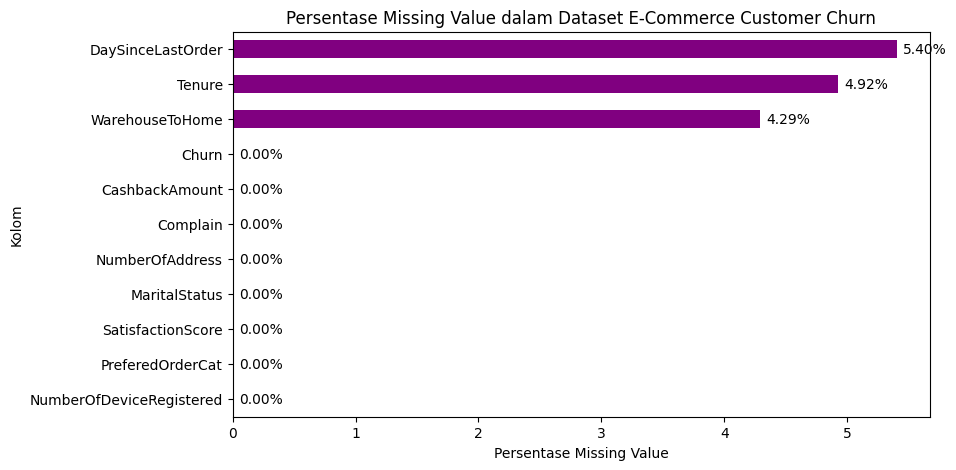

In [10]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

# Sebaran missing value di dalam data
missing_values_count = df.isna().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Visualisasi menggunakan horizontal bar plot untuk sebaran missing value
plt.figure(figsize=(9, 5))
ax = missing_values_percentage.sort_values().plot(kind='barh', color='purple')
plt.title('Persentase Missing Value dalam Dataset E-Commerce Customer Churn')
plt.xlabel('Persentase Missing Value')
plt.ylabel('Kolom')
for i, v in enumerate(missing_values_percentage.sort_values()):
    ax.text(v + 0.05, i, f'{v:.2f}%', color='black', ha='left', va='center')
plt.show()

In [11]:
# lihat semua data yang kosong
df[df.isna().any(axis = 1)]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
...,...,...,...,...,...,...,...,...,...,...,...
3900,0.0,NaN,4,Mobile,1,Single,2,1,0.0,124.39,1
3904,2.0,28.0,2,Fashion,4,Married,8,0,NaN,219.96,0
3907,2.0,NaN,3,Mobile,5,Divorced,8,1,2.0,124.04,1
3925,NaN,8.0,4,Mobile,3,Single,2,0,2.0,120.44,1


In [12]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')


Jumlah missing value: 576
Jumlah baris dengan missing value: 576
Persentase Baris dengan missing value: 14.62%


Karena jumlah missing value yang cukup signifikan, yaitu 14,56%, baris yang mengandung missing value tidak akan dihapus karena dapat mengurangi jumlah data dan informasi yang tersedia. Semua missing value tersebut merupakan data numerik bertipe float. Missing value akan dianalisis lebih lanjut menggunakan package missingno, karena memahami tipe data yang hilang akan memudahkan dalam memilih metode penanganan yang tepat.

<Axes: >

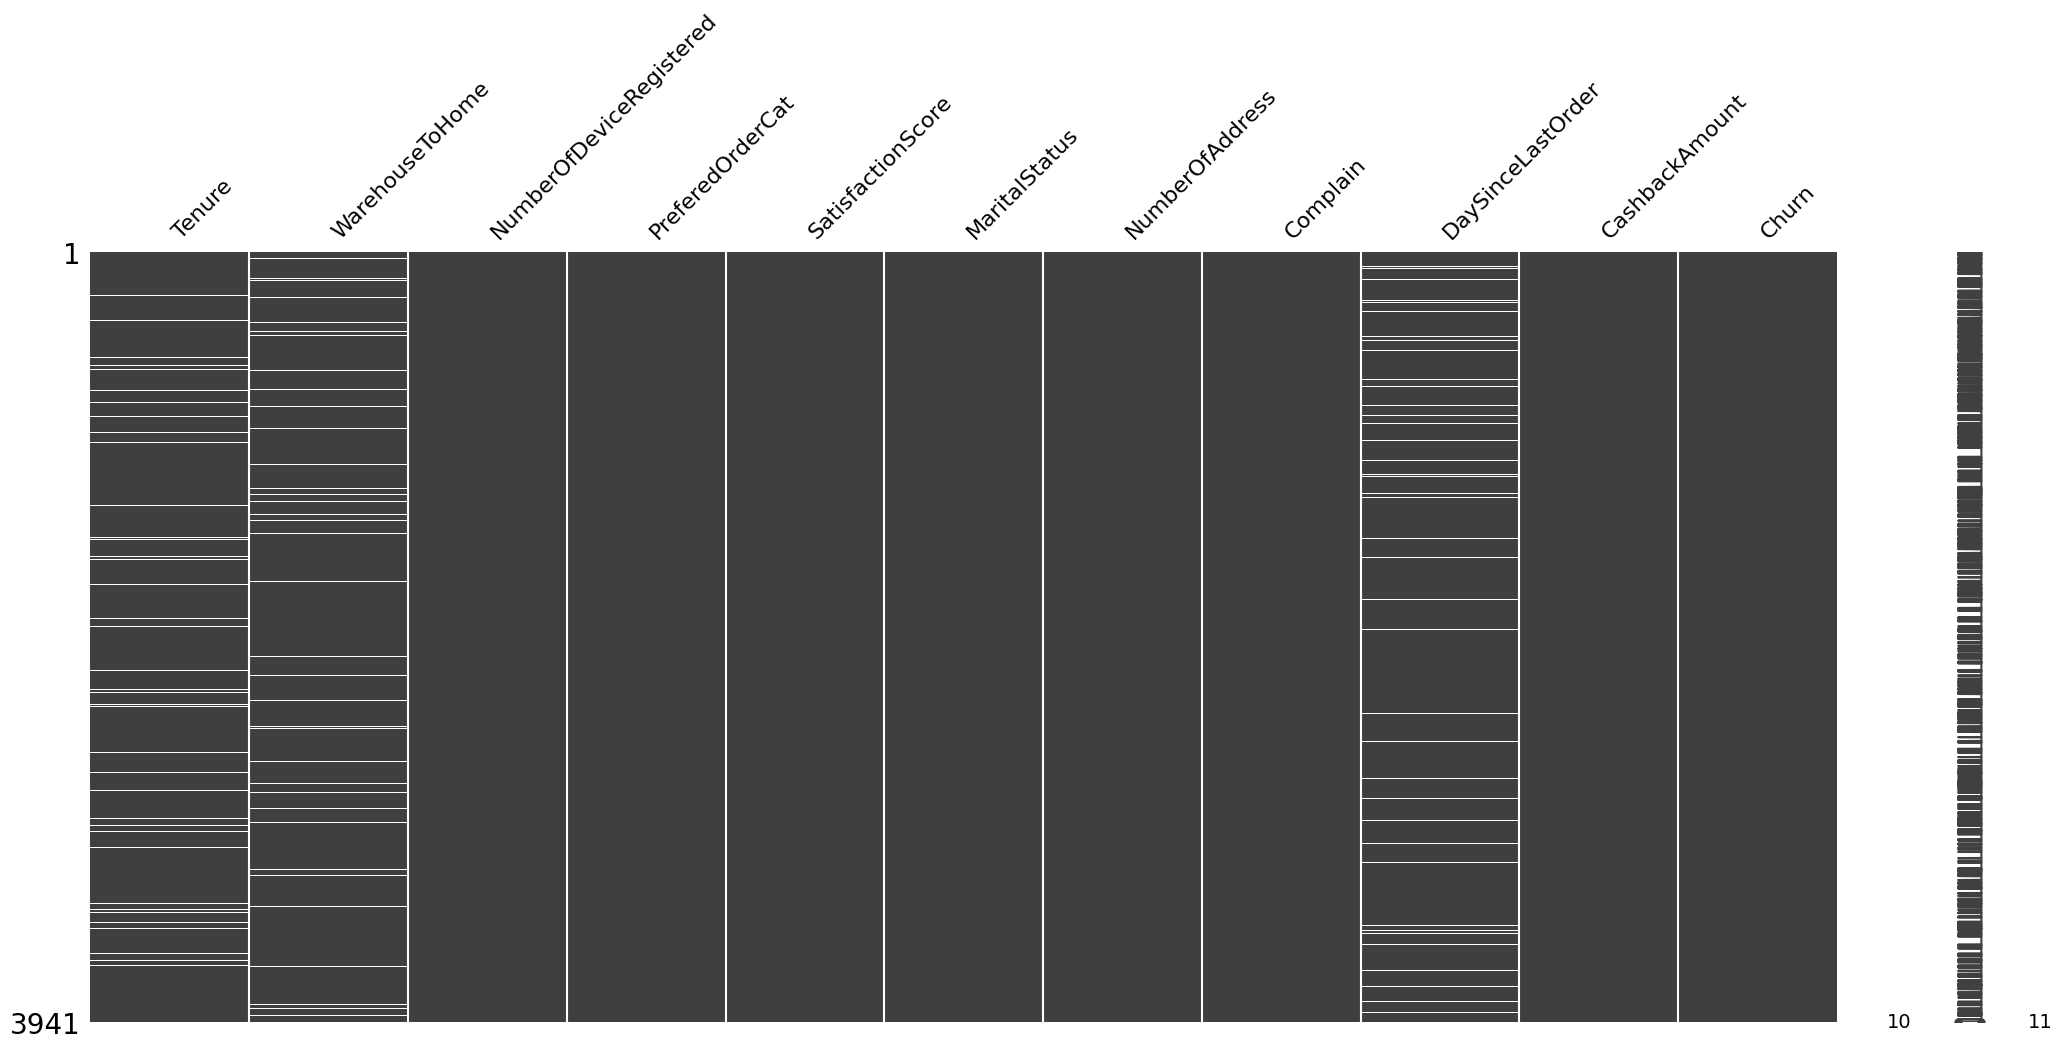

In [13]:
# Hubungan antar missing values secara visualisasi

msno.matrix(df)

Terlihat bahwa missing value tidak menunjukkan pola khusus dan cenderung acak. Dari fitur-fitur di atas, variabel yang berpotensi mempengaruhi antara lain SatisfactionScore dan CashbackAmount, yang memiliki dampak langsung terhadap transaksi. Oleh karena itu, data akan diurutkan berdasarkan kedua variabel tersebut.

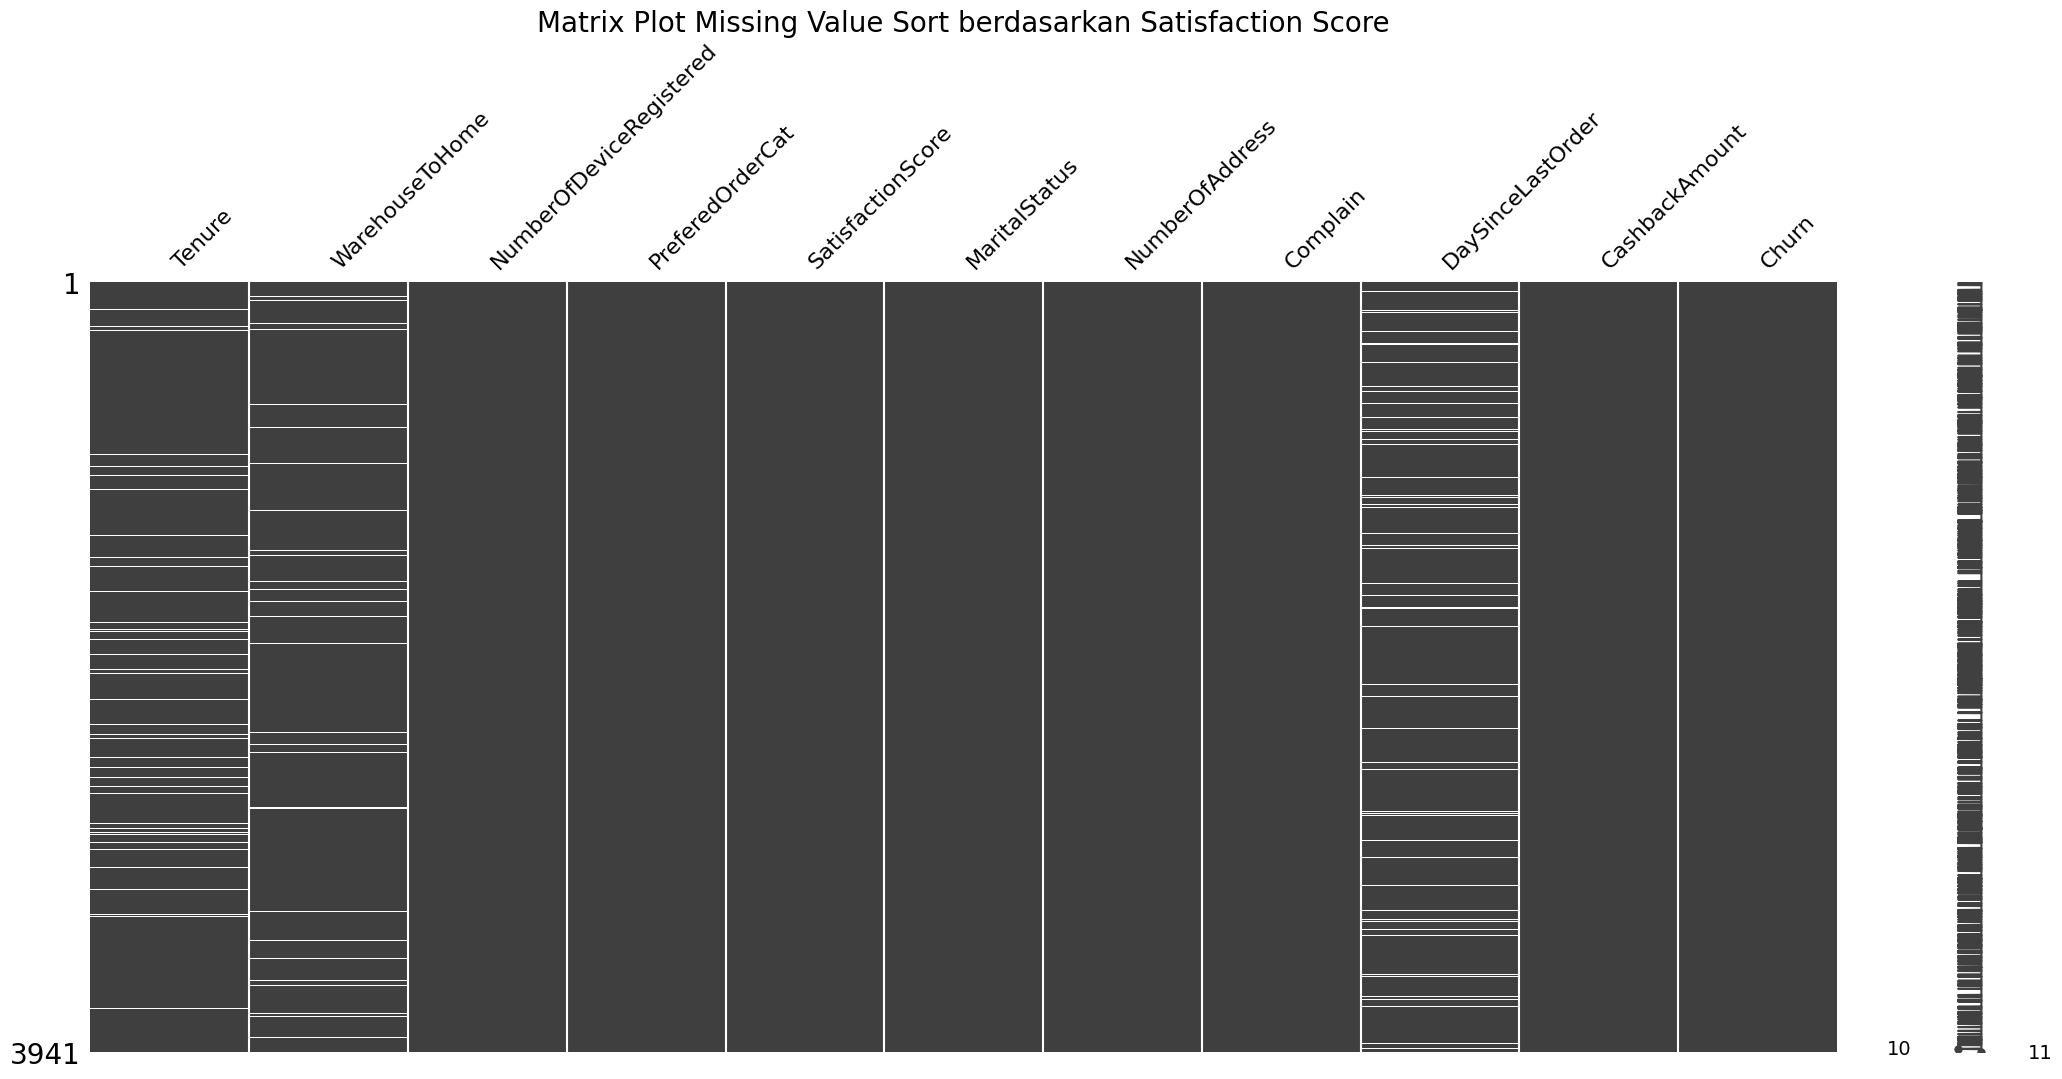

In [14]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

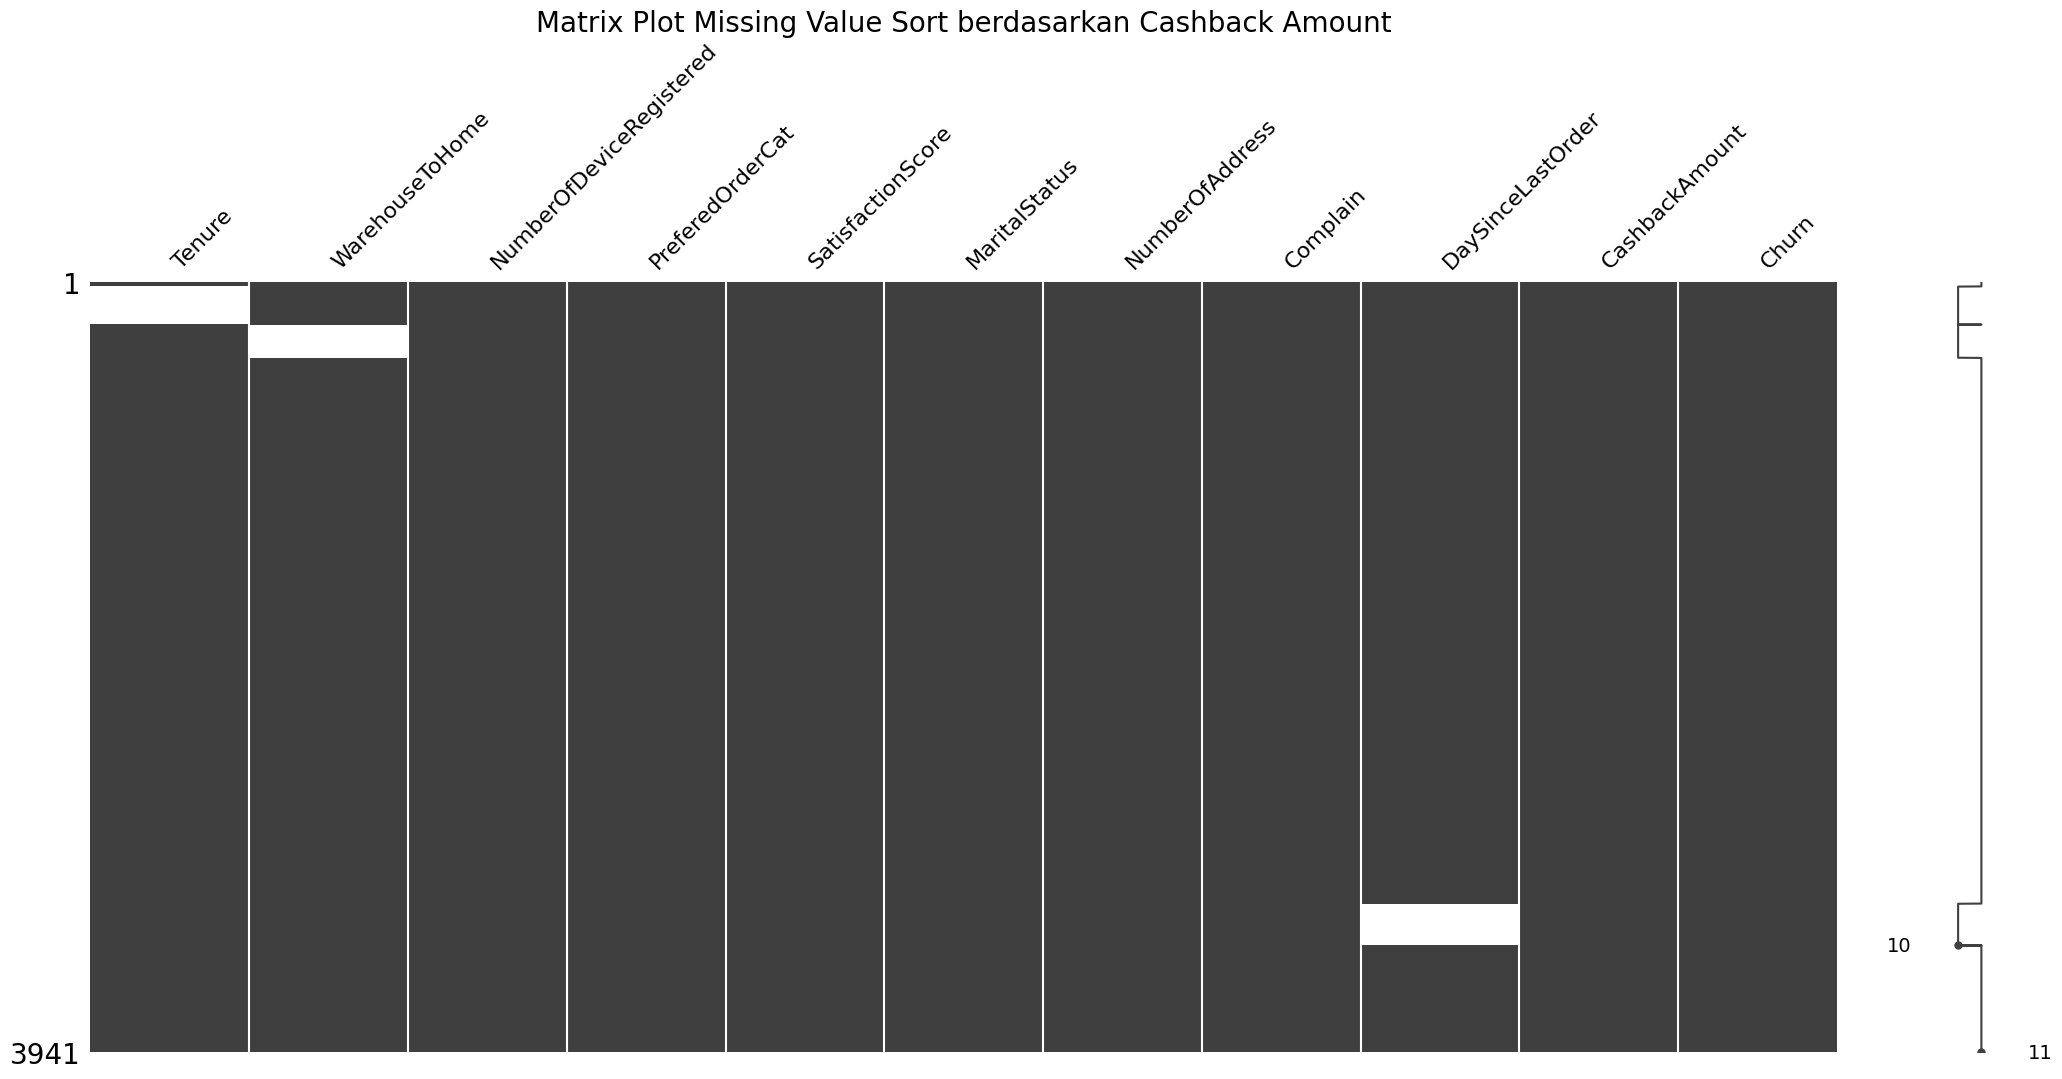

In [15]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [16]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,194.000000,194.00000,194,194.000000,194,194.000000,194.000000,194.000000,194.000000,194.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,151,NaN,93,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.556701,3.28866,NaN,3.180412,NaN,3.144330,0.257732,2.025773,120.363660,0.329897
std,NaN,7.714422,0.80102,NaN,1.284998,NaN,2.332424,0.438517,2.328992,2.737009,0.471392
min,NaN,6.000000,1.00000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.00000,NaN,3.000000,NaN,2.000000,0.000000,0.000000,120.220000,0.000000
50%,NaN,13.000000,3.00000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.070000,0.000000
75%,NaN,19.000000,4.00000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.175000,1.000000


In [17]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,169.000000,0.0,169.000000,169,169.00000,169,169.000000,169.000000,169.000000,169.000000,169.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,162,NaN,74,NaN,NaN,NaN,NaN,NaN
mean,6.337278,NaN,3.201183,NaN,3.08284,NaN,3.514793,0.301775,2.461538,124.584793,0.355030
std,7.480043,NaN,0.849229,NaN,1.44922,NaN,2.526306,0.460392,2.712405,0.987585,0.479944
min,0.000000,NaN,1.000000,NaN,1.00000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.00000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,4.000000,NaN,3.000000,NaN,3.00000,NaN,2.000000,0.000000,2.000000,124.390000,0.000000
75%,11.000000,NaN,4.000000,NaN,4.00000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [18]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,213.000000,213.000000,213.000000,213,213.000000,213,213.000000,213.000000,0.0,213.000000,213.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,166,NaN,121,NaN,NaN,NaN,NaN,NaN
mean,11.530516,15.647887,4.103286,NaN,2.915493,NaN,4.877934,0.272300,NaN,220.923052,0.187793
std,8.281330,8.079963,0.894764,NaN,1.418342,NaN,2.606981,0.446192,NaN,6.621594,0.391467
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,2.000000,NaN,3.000000,0.000000,NaN,214.980000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.690000,0.000000
75%,17.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.090000,0.000000


Dari matrix plot di atas, terlihat bahwa data hilang secara acak (pola umum), namun memiliki keterkaitan dengan variabel CashbackAmount. Ini menunjukkan bahwa data tergolong Missing at Random (MAR), di mana terdapat hubungan sistematis antara variabel yang hilang dengan variabel lainnya, namun tidak langsung dengan variabel yang memiliki missing value tersebut. Jika kehilangan data tampak acak, tetapi setelah diteliti lebih lanjut terdapat hubungan antara fitur yang ada (ini adalah poin penting), maka missing value tersebut termasuk dalam kategori MAR.

Sumber : https://medium.com/@ayeshasidhikha188/types-of-missing-values-fba155099ac7

Dari data diatas, ditemukan beberapa hal:

- Tenure yang kosong memiliki rata-rata cashback dalam rentang 112,00 hingga 123,13.
- WarehouseToHome yang kosong memiliki rata-rata cashback dalam rentang 123,18 hingga 126,57.
- DaySinceLastOrder yang kosong memiliki rata-rata cashback dalam rentang 209,34 hingga 231,42.

Kesimpulan dari pengamatan ini adalah bahwa missing value tergolong MAR dan memiliki keterkaitan dengan kolom CashbackAmount. Metode yang tepat untuk digunakan adalah Iterative Imputation karena datanya bersifat multivariat atau dipengaruhi oleh variabel lain. Selain itu, imputasi menggunakan median tidak disarankan, karena mengganti banyak missing value dengan median dapat menghasilkan bias pada total data dan memengaruhi performa model.

Sumber : https://www.simplilearn.com/data-imputation-article

Sebelum itu, percobaan akan dilakukan untuk membandingkan distribusi kolom sebelum dan sesudah imputasi pada kolom Tenure, WarehouseToHome, dan DaySinceLastOrder. Hasil yang diharapkan adalah perbedaan distribusi kolom sebelum dan sesudah imputasi tidak terlalu signifikan.

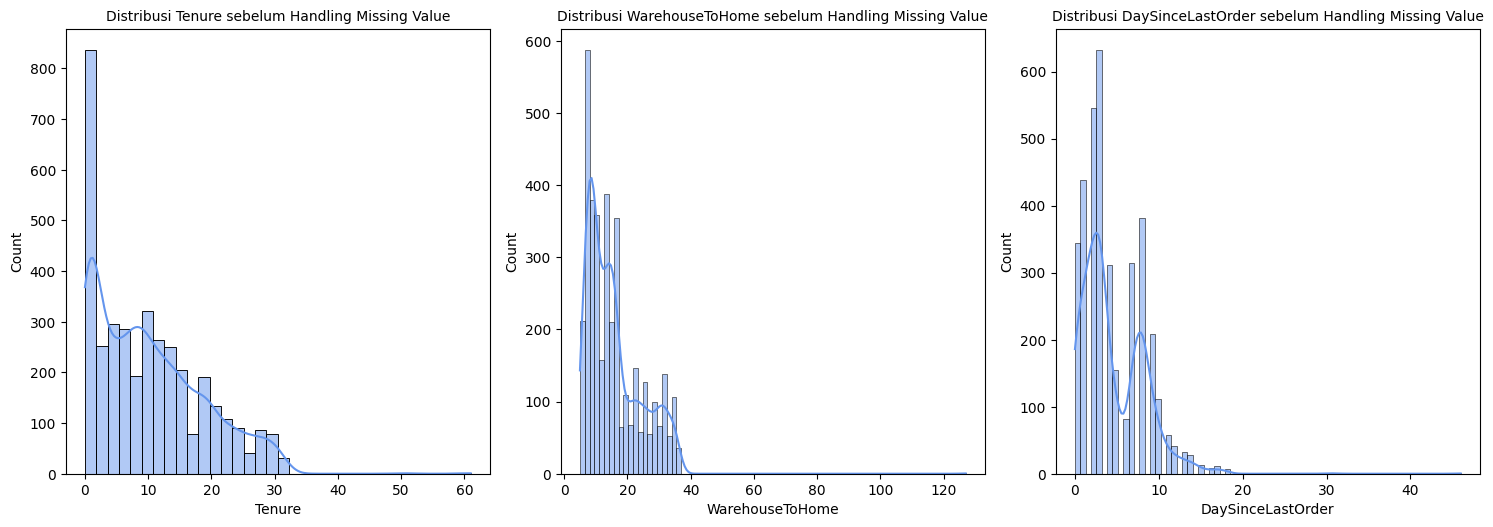

In [19]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.histplot(df[features[i]], color='cornflowerblue', kde=True)
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

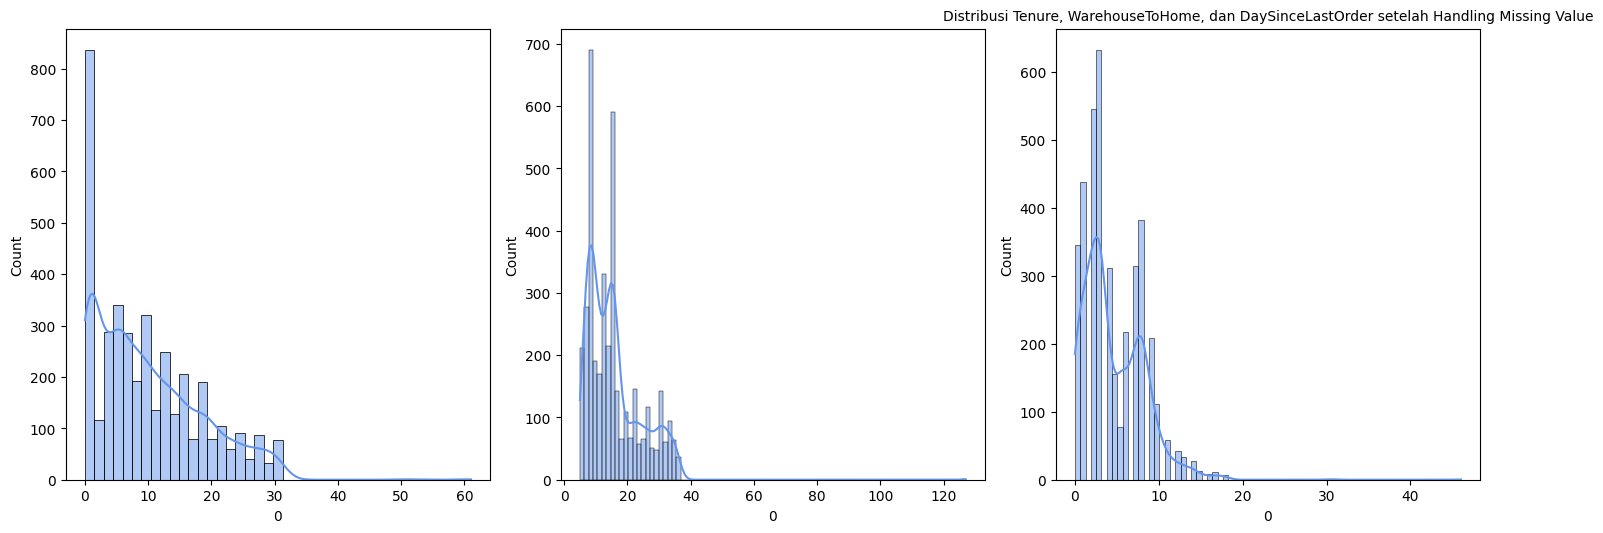

In [20]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.histplot(i[0], color='cornflowerblue', kde=True)
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

Data sebelum dan sesudah imputasi menunjukkan perbedaan distribusi yang tidak signifikan. Penanganan missing value akan dilakukan pada tahap data preprocessing.

## Data Duplikat

In [21]:
# jumlah yang duplikat
df.duplicated().sum()

671

In [22]:
# mendrop data duplikat
df.drop_duplicates(inplace = True)

In [23]:
# cek kembali data duplikat
df.duplicated().sum()

0

## Variable Numerik

### Statistika Deskriptif

In [24]:
# Statistika dekriptif
df.describe() # OTOMATIS hanya mengambil yang numerik

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


### Distribusi Data

In [25]:
len(df.select_dtypes(include = 'number').columns)

9

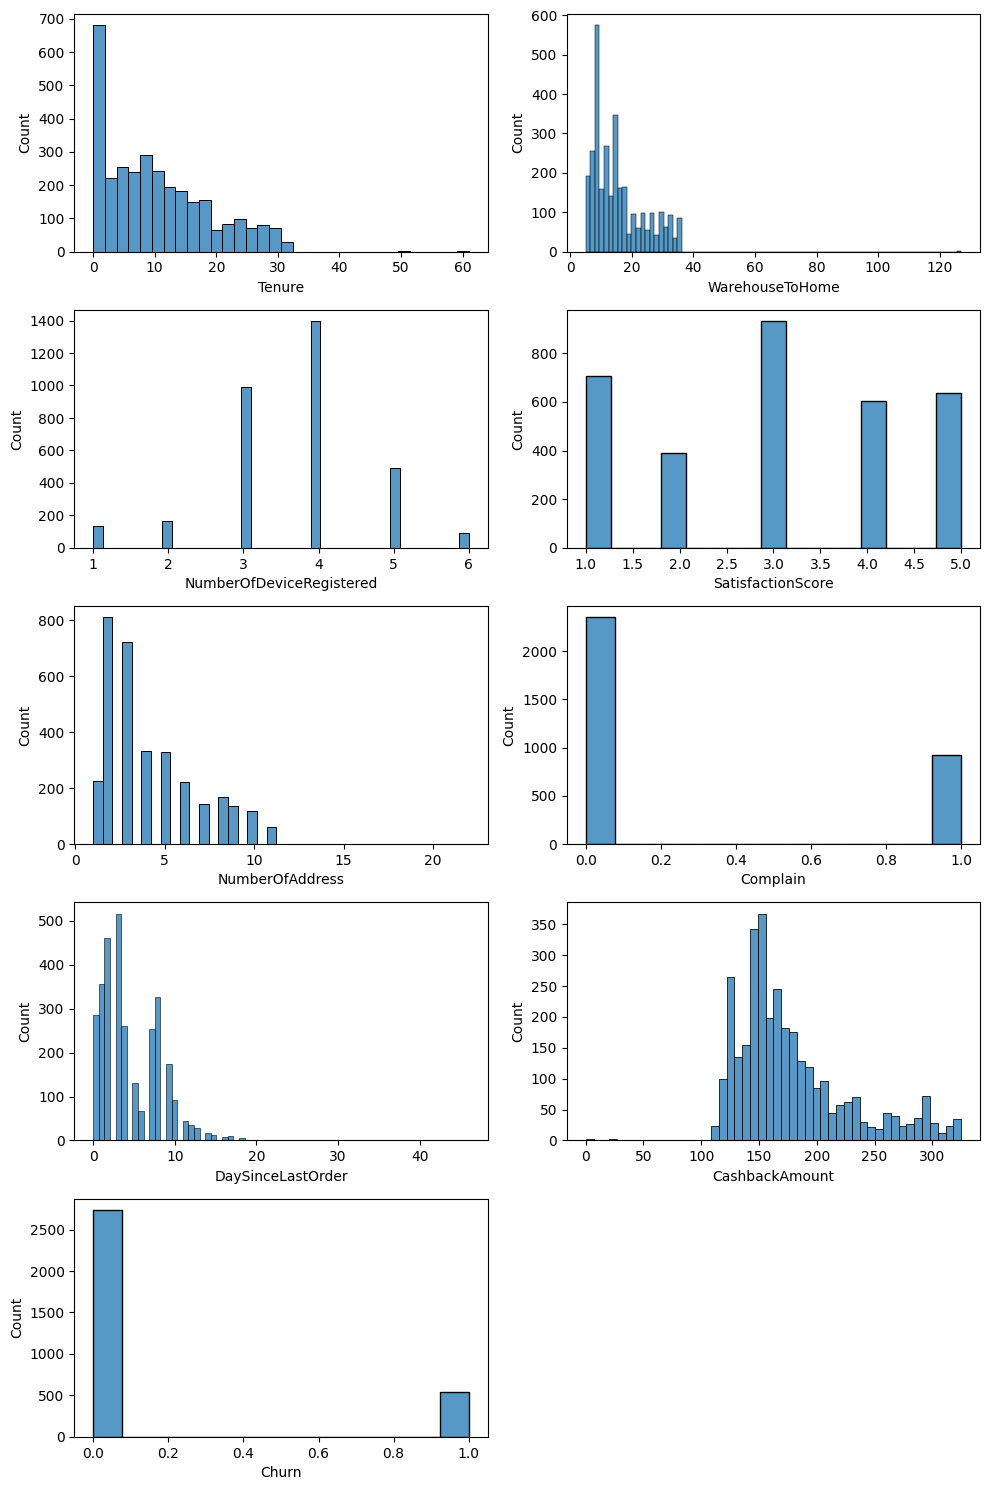

In [26]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,15))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.histplot(df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

### Outliers

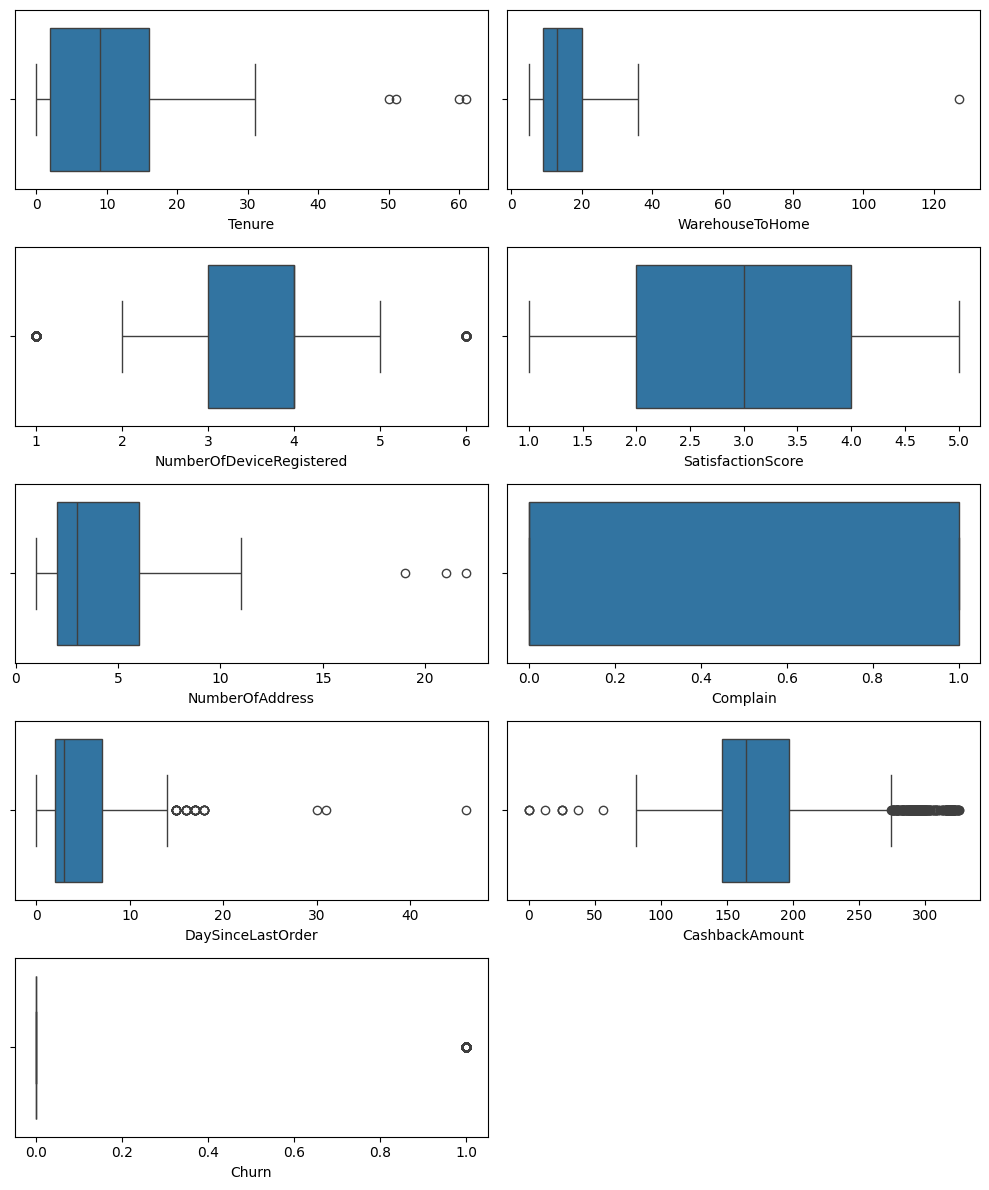

In [27]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,12))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

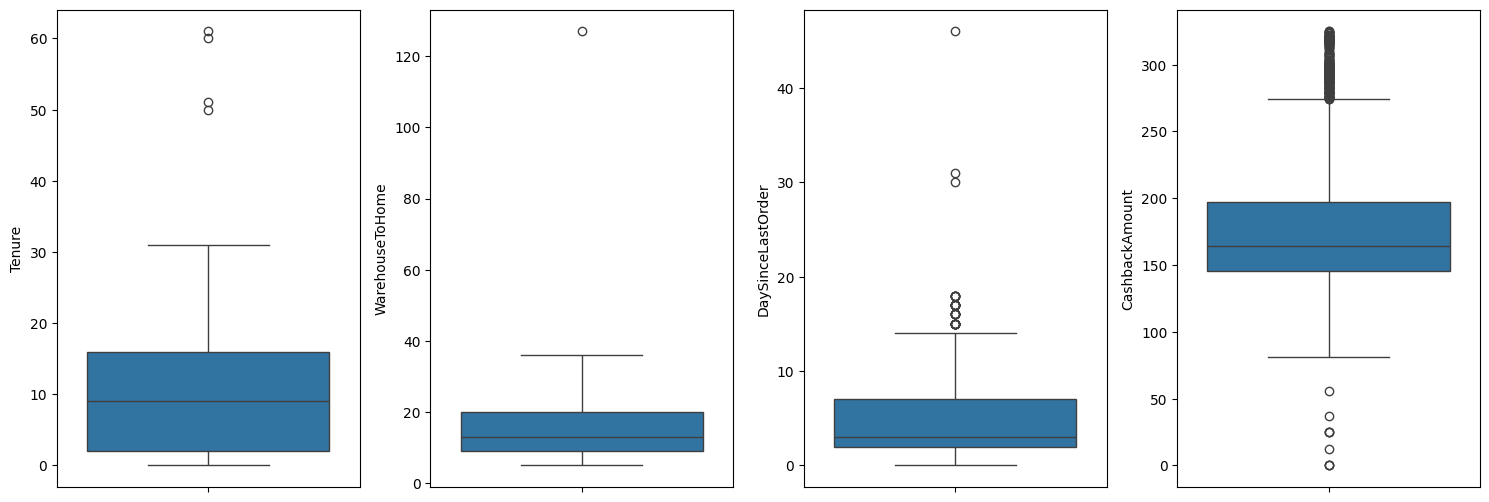

In [28]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], orient='v')
  plt.tight_layout()


In [29]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.29%
Lower Bound CashbackAmount adalah 69.02, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Berdasarkan perhitungan di atas, outlier pada kolom Tenure dan WarehouseToHome akan dihapus karena persentasenya kecil. Sementara itu, outlier pada kolom DaySinceLastOrder dan CashbackAmount akan diabaikan karena dianggap wajar meskipun memiliki variansi yang tinggi. Tindakan lebih lanjut akan dilakukan pada tahap preprocessing, termasuk melakukan binning pada kolom CashbackAmount.

### Korelasi

<Axes: >

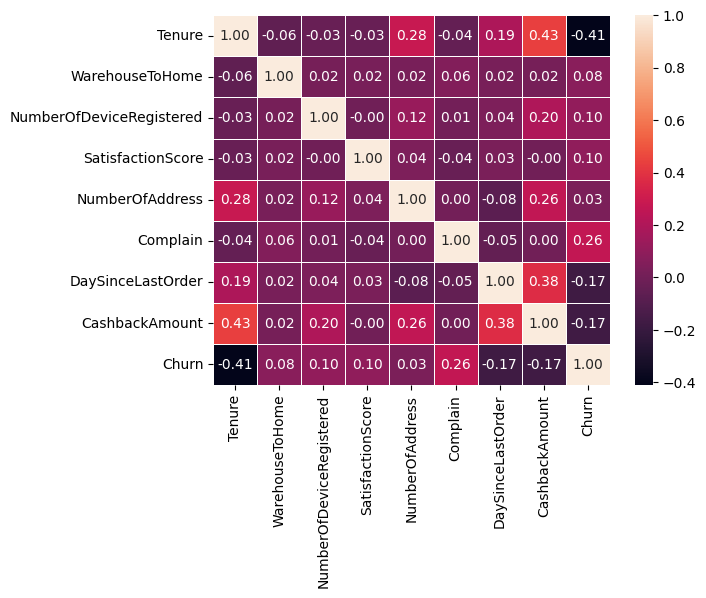

In [30]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True, fmt='.2f', linewidths=0.5)

## Variabel Kategorik

### Describe

In [31]:
df.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3270,3270
unique,6,3
top,Laptop & Accessory,Married
freq,1213,1686


### Unique Values

In [32]:
kategorik = df.select_dtypes(include = 'object')

# menghitung jumlah unique value setiap variabel kategorik
kategorik.nunique()

,0
PreferedOrderCat,6
MaritalStatus,3


<Axes: >

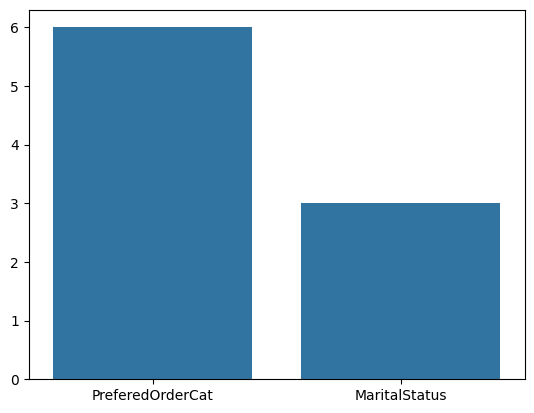

In [33]:
sns.barplot(kategorik.nunique())

### Value Counts

In [34]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,1213
Mobile Phone,725
Fashion,484
Mobile,458
Grocery,241
Others,149


In [35]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,1686
Single,1008
Divorced,576


# Data Cleaning

**PreferedOrderCat**

In [36]:
# Menampilkan nilai unik pada kolom 'PreferedOrderCat' saja
listItem = []
col = 'PreferedOrderCat'  # kolom yang ingin ditampilkan
listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"


Dapat dilihat bahwa pada kolom PreferedOrderCat memiliki data Mobile dan Mobile Phone, yang kemungkinan memiliki makna yang sama. Sehingga data tersebut perlu disamakan penulisan namanya. Dalam hal ini, semua data Mobile akan diubah menjadi Mobile Phone

In [37]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,1213
Mobile Phone,725
Fashion,484
Mobile,458
Grocery,241
Others,149


In [38]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,1213
Mobile Phone,1183
Fashion,484
Grocery,241
Others,149


# Data Preparation

Terdapat beberapa langkah pada tahap ini, diantaranya:

- Kolom CashbackAmount yang memiliki variansi tinggi akan diubah menjadi kolom kategorik baru melalui proses binning. Dengan mengubahnya menjadi kolom kategorik melalui proses binning, data dapat dikelompokkan ke dalam kategori yang lebih representatif. Hal ini membantu model untuk menangkap pola-pola yang relevan dalam data.
- Penanganan missing value akan dilakukan menggunakan IterativeImputer pada kolom Tenure, WarehouseToHome, dan DaySinceLastOrder sesuai dengan analisis sebelumnya. Metode ini lebih efektif dibandingkan dengan imputasi sederhana karena mempertahankan informasi dari variabel lain, yang berpotensi meningkatkan akurasi model.
- One-Hot Encoding akan diterapkan pada kolom MaritalStatus karena memiliki sedikit kategori, yaitu 3 dan tidak ada urutan tertentu. Metode ini mengonversi kategori menjadi variabel biner, sehingga model dapat lebih mudah memproses data tersebut tanpa memperkenalkan bias yang mungkin timbul dari peringkat yang tidak ada.
- Binary Encoding akan digunakan pada kolom PreferedOrderCat karena memiliki sejumlah kategori yang cukup banyak, yaitu 5 jenis yang berbeda, tanpa urutan tertentu. Ini juga membantu menjaga model tetap ringan dan cepat dalam komputasi.
- Ordinal Encoding akan diterapkan pada kolom CashbackAmountClass karena kategori tersebut memiliki urutan tertentu, mulai dari sangat kecil hingga sangat besar.Menggunakan Ordinal Encoding memungkinkan model untuk memahami hubungan hierarkis antara kategori-kategori ini. Ini memastikan bahwa model memperhitungkan urutan dan tidak hanya melihat kategori sebagai entitas terpisah, yang dapat meningkatkan interpretasi dan akurasi model.

## Binning

In [39]:
# Melakukan binning pada kategori CashbackAmount
bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
df['CashbackAmountClass']= pd.cut(df['CashbackAmount'], 5,labels = bin_labels)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Sedang
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Kecil
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Sedang
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,Besar
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Sangat Besar


In [40]:
df.groupby('CashbackAmountClass', observed=True)['CashbackAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CashbackAmountClass,,,,,,,,
Sangat Kecil,9.0,20.000000,19.118054,0.00,0.0000,25.000,25.0000,56.00
Kecil,430.0,123.609395,4.686295,81.00,121.4325,123.800,126.9450,129.96
Sedang,1988.0,160.184844,16.298668,130.22,147.7650,157.030,172.6525,194.62
Besar,517.0,220.068221,17.275935,195.05,204.7500,218.960,232.4800,259.99
Sangat Besar,326.0,290.187117,18.392188,260.03,274.0575,291.895,300.7975,324.99


## Data Splitting

In [41]:
# Membuat fitur x dan target y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0,
    stratify = y # JANGAN SAMPAI LUPA UNTUK KLASIFIKASI di stratify
)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2616, 11), (654, 11), (2616,), (654,))

## Handling Missing Value

In [44]:
def imputation(x_train, x_test, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(X_train[cont_features])
    X_train[cont_features] = imputerCont.transform(X_train[cont_features])
    X_test[cont_features] = imputerCont.transform(X_test[cont_features])
    return X_train, X_test

Dari fungsi tersebut, dilakukan imputasi missing value data train dan data test.

In [45]:
fitur= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

# Fit dan transform missing value imputation
X_train , X_test = imputation(X_train, X_test,fitur)

In [46]:
# Melihat missing value
print(X_test.isna().sum(), X_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64


Dapat dilihat bahwa missing value sudah tidak ada, maka selanjutnya adalah melakukan encoding

## Encoding

In [47]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmountClass',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1,
        'Sedang': 2,
        'Besar' : 3,
        'Sangat Besar' : 4,
    }}
]

Lalu membuat transformer encoding

In [48]:
# Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['CashbackAmountClass']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough'
 ,force_int_remainder_cols=False)

In [49]:
# Melihat preview hasil encoding
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,ordinal__CashbackAmountClass,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,1.0,0.0,2.0,0.0,0.0,1.0,9.0,14.000000,5.0,1.0,3.0,0.0,2.000000,151.90
1,1.0,0.0,2.0,0.0,0.0,1.0,1.0,23.000000,4.0,4.0,11.0,0.0,3.000000,153.11
2,1.0,0.0,4.0,0.0,1.0,0.0,23.0,29.000000,4.0,4.0,5.0,0.0,3.000000,289.13
3,0.0,1.0,2.0,0.0,0.0,1.0,6.0,9.000000,4.0,5.0,3.0,0.0,3.000000,149.39
4,0.0,1.0,2.0,0.0,0.0,1.0,10.0,14.000000,4.0,1.0,4.0,0.0,2.000000,171.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,1.0,0.0,3.0,0.0,1.0,1.0,19.0,13.000000,4.0,5.0,6.0,1.0,1.000000,257.45
2612,1.0,0.0,2.0,1.0,0.0,0.0,20.0,15.000000,5.0,5.0,10.0,1.0,8.000000,171.15
2613,1.0,0.0,3.0,0.0,1.0,1.0,5.0,14.000000,5.0,3.0,3.0,0.0,5.546858,214.43
2614,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.581219,5.0,3.0,1.0,0.0,0.000000,123.51


# Modeling

Beberapa metode klasifikasi yang akan dievaluasi untuk menentukan model terbaik bagi dataset ini meliputi Logistic Regression, K-Nearest Neighbour, Decision Tree, Random Forest, dan XGBoost.

In [50]:
# Inisialisasi model klasifikasi yang berbeda untuk evaluasi

logreg = LogisticRegression(solver='liblinear',random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

Beberapa aspek yang perlu diperhatikan dalam benchmark model ini meliputi:  
* Seperti yang telah diuraikan dalam analisis data, dataset ini mengalami ketidakseimbangan, sehingga diperlukan langkah resampling. Metode resampling yang diterapkan adalah SMOTE, yang berfungsi untuk menambah jumlah data pada kelas minoritas.  
* Selain itu, akan diterapkan Stratified K-Fold yang bertujuan untuk mempertahankan distribusi kelas target (churn) saat membagi data untuk cross-validation.  
* Metrik yang digunakan adalah ROC-AUC, karena saya ingin mengevaluasi probabilitas dan memastikan bahwa kedua kelas memiliki kepentingan yang sama.  
* Hyperparameter diatur ke pengaturan default dan semua fitur akan digunakan.

### SMOTE & Stratified K-Fold

In [52]:
# Daftar model yang akan dievaluasi
models = [logreg, knn, dt, rf, xgb]

# Inisialisasi list untuk menyimpan skor, rata-rata, dan deviasi standar
scores = []
mean_roc_auc = []
std_dev = []

# Loop melalui setiap model dalam daftar models
for model in models:
    # Inisialisasi SMOTE untuk oversampling kelas minoritas
    smote = SMOTE(random_state=0)

    # Inisialisasi StratifiedKFold untuk cross-validation
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)  # Tambahkan shuffle untuk pengacakan

    # Membuat pipeline untuk preprocessing, resampling, dan model
    estimator = Pipeline([
        ('preprocess', transformer),  # Langkah preprocessing
        ('resampling', smote),        # Langkah oversampling dengan SMOTE
        ('model', model)              # Model yang sedang diuji
    ])

    # Melakukan cross-validation dan menghitung skor AUC
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')

    # Menyimpan hasil cross-validation
    scores.append(model_cv)           # Skor untuk setiap fold
    mean_roc_auc.append(model_cv.mean())  # Rata-rata AUC
    std_dev.append(model_cv.std())    # Deviasi standar AUC

# Membuat DataFrame untuk menampilkan hasil evaluasi
result_df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'mean roc_auc': mean_roc_auc,    # Rata-rata skor AUC
    'std_dev': std_dev                 # Deviasi standar AUC
}).set_index('model').sort_values(by='mean roc_auc', ascending=False)

# Menampilkan hasil
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':mean_roc_auc,'sdev':std_dev}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


,mean roc_auc,sdev
model,,
XGBoost,0.922594,0.013733
Random Forest,0.921100,0.009822
Logistic Regression,0.871992,0.012573
KNN,0.798958,0.022127
Decision Tree,0.753348,0.025679


Pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter default adalah XGBoost dan Random Forest dengan nilai rata-rata ROC-AUC masing-masing 0.922 dan 0.921. Nilai metrik dinilai cukup tinggi, sehingga akan dicoba implementasi pada data test.

## Test Data

In [53]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    X_train,X_test

    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.75      0.84       547
           1       0.40      0.88      0.55       107

    accuracy                           0.77       654
   macro avg       0.69      0.81      0.70       654
weighted avg       0.88      0.77      0.80       654

KNN 
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       547
           1       0.39      0.71      0.50       107

    accuracy                           0.77       654
   macro avg       0.66      0.74      0.67       654
weighted avg       0.84      0.77      0.79       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       547
           1       0.57      0.68      0.62       107

    accuracy                           0.86       654
   macro avg       0.75      0.79      0.77       654
weighted avg       0.88      0

,roc_auc score
model,
XGBoost,0.944882
Random Forest,0.936049
Logistic Regression,0.897042
KNN,0.812435
Decision Tree,0.790847


Berdasarkan data di atas, model XGBoost dan Random Forest menunjukkan nilai ROC_AUC tertinggi, yaitu masing-masing 0.944 dan 0.936. Oleh karena itu, langkah selanjutnya adalah meningkatkan performa kedua model tersebut melalui tuning hyperparameter dan membandingkan hasilnya.

## Hyperparameter Tuning

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Random forest dan XGBoost

In [ ]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_rf', rf)])
Pipe_xgb = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220],
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf,
                      cv = skfold,
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(X_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb,
                      cv = skfold,
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(X_train,y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.3s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.2s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

In [ ]:
# XGBoost
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)

Proses tuning hyperparameter dilakukan dengan membandingkan nilai default dengan nilai yang dioptimalkan melalui beberapa iterasi, serta memanfaatkan grid search. Berdasarkan pengamatan dari beberapa percobaan tuning, berikut adalah parameter terbaik yang diperoleh:

* Untuk XGBoost, nilai terbaik yang dicapai adalah 0.937, dengan learning rate sebesar 0.08, max depth 17, n_estimators 200, dan subsample 0.8.
* Untuk Random Forest, nilai terbaik yang diperoleh adalah 0.927, dengan max depth 17, min samples leaf 2, min samples split tetap 2 (default), dan n_estimators 200.
* Hasil tuning menunjukkan bahwa nilai XGBoost lebih tinggi dibandingkan dengan nilai Random Forest.

Dengan demikian, langkah selanjutnya adalah melanjutkan pengembangan menggunakan XGBoost.

In [ ]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(X_train, y_train)

In [ ]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Pada data di atas, terdapat beberapa informasi yang dapat diperoleh, antara lain:

* Hasil dari hyperparameter tuning menunjukkan bahwa perbedaan ROC_AUC antara model XGBoost default dan yang telah dituning tidak terlalu signifikan, yaitu meningkat sebesar 0.05. Nilai ROC_AUC untuk parameter yang telah dituning adalah 0.94.
* Hasil tuning hyperparameter telah dibandingkan dengan parameter default, dan diperoleh nilai yang cukup baik.
* Oleh karena itu, model yang akan digunakan adalah model dengan hyperparameter tuning, yang menghasilkan metrik recall 0.68 dan precision 0.70 untuk kelas positif, serta f1 score sebesar 0.69. Sementara untuk kelas negatif, diperoleh recall 0.94, precision 0.94, dan f1 score 0.94.

# Final Model

In [ ]:
# Model Akhir
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(X_train, y_train)

## Feature Importances

In [ ]:
coef1 = pd.Series(best_model[2].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari data di atas, dapat diidentifikasi faktor-faktor yang mempengaruhi potensi pelanggan churn serta model machine learning. Fitur yang paling berpengaruh adalah keluhan (complaint), diikuti oleh masa tenure pelanggan, dan status pernikahan (MaritalStatus). Analisis ini dapat ditingkatkan melalui feature selection atau kombinasi fitur-fitur yang signifikan untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik saat ini.

Selain itu, faktor-faktor tersebut juga dapat memberikan wawasan berharga bagi bisnis. Perusahaan perlu menerima umpan balik dari pelanggan yang mengajukan keluhan dan menindaklanjuti masalah tersebut, baik melalui platform e-commerce maupun marketplace yang terdaftar. Selain itu, perusahaan bisa meningkatkan retensi pelanggan dengan menawarkan promo-promo menarik yang berkelanjutan, seperti melalui program berlangganan.

## Limitasi

- Model ini dilatih menggunakan data dari platform e-commerce, sehingga mungkin kurang efektif jika diterapkan pada industri lain
- Model yang lebih akurat memerlukan sumber daya komputasi yang lebih tinggi, yang bisa menjadi kendala bagi perusahaan dalam jangka panjang.

## Estimasi Keuntungan

In [ ]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

**Classification Report Tuned XGBoost**:
- Recall untuk kelas churn (1) = 0.68 (model bisa mengidentifikasi 68% pelanggan churn)
- Recall untuk kelas tidak churn (0) = 0.94 (model bisa mengidentifikasi 94% pelanggan yang tidak churn)

### Contoh Kasus:
Misalnya, perusahaan memiliki 5000 pelanggan, dengan 600 pelanggan churn dan 4400 pelanggan tidak churn. Biaya mempertahankan pelanggan adalah 15 USD per pelanggan, sedangkan biaya mendapatkan pelanggan baru adalah 50 USD.

#### *Tanpa Model* (Semua pelanggan diberikan penawaran):
- **Total Biaya**: 5000 x 15 USD = 75,000 USD
- **Total pelanggan churn yang ditemukan**: 600 orang
- **Total pelanggan churn yang tidak ditemukan**: 0 orang
- **Total pelanggan tidak churn yang ditemukan**: 4400 orang
- **Total pelanggan tidak churn yang tidak ditemukan**: 0 orang
- **Biaya yang terbuang**: 4400 x 15 USD = 66,000 USD

#### *Dengan Model* (Penawaran diberikan sesuai prediksi):
- **Total Biaya**: (600 x 0.68) x 15 USD = 6,120 USD
- **Total pelanggan churn yang ditemukan**: (600 x 0.68) = 408 orang
- **Total pelanggan churn yang tidak ditemukan**: 600 - 408 = 192 orang
- **Total pelanggan tidak churn yang ditemukan**: (4400 x 0.94) = 4136 orang
- **Total pelanggan tidak churn yang tidak ditemukan**: 4400 - 4136 = 264 orang
- **Biaya yang terbuang**:
   - Biaya mempertahankan pelanggan yang salah (FP): 264 x 15 USD = 3,960 USD
   - Biaya kehilangan pelanggan yang tidak ditemukan (FN): 192 x 50 USD = 9,600 USD
   - Total biaya yang terbuang: 3,960 + 9,600 = 13,560 USD

#### **Penghematan**:
- **Penghematan biaya**: 66,000 USD (tanpa model) - 13,560 USD (dengan model) = **52,440 USD**

Dengan menggunakan model prediktif, perusahaan dapat menghemat **52,440 USD** dengan strategi pemasaran yang lebih tepat sasaran.

Selain itu, faktor utama yang mempengaruhi potensi churn adalah **complain** dan **tenure**. Pelanggan yang memiliki keluhan lebih rentan untuk churn, terutama jika masa tenure mereka singkat. Ini memberikan wawasan penting bagi perusahaan untuk lebih memperhatikan keluhan pelanggan dan meningkatkan retensi mereka.

# Kesimpulan dan Rekomendasi

## Kesimpulan

Model XGBoost dengan hyperparameter tuning merupakan model terbaik untuk memprediksi customer churn dengan nilai ROC AUC 0.94. Fitur yang paling berpengaruh adalah Complaint, diikuti oleh Tenure, dan MaritalStatus.

Berikut rinciannya :
- Model terbaik: XGBoost dengan hyperparameter tuning.
Hyperparameter:
- learning_rate: 0.08
- max_depth: 17
- n_estimators: 200
- subsample: 0.8
- ROC AUC score: 0.94
- Keuntungan menggunakan ML: Penghematan biaya sebesar 52,440 USD dengan strategi pemasaran yang lebih tepat sasaran.

Model ini dapat membantu perusahaan untuk:

- Mencegah customer churn: Dengan memprediksi pelanggan yang akan churn, perusahaan dapat melakukan intervensi dini, seperti memberikan penawaran khusus atau meningkatkan layanan.
- Mengurangi biaya retensi: Perusahaan dapat memfokuskan upaya retensi pada pelanggan yang diprediksi akan churn, sehingga mengurangi biaya yang tidak perlu.
- Meningkatkan keuntungan: Dengan mengurangi churn, perusahaan dapat mempertahankan pendapatan dan meningkatkan keuntungan.

## Rekomendasi untuk model

1. **Performa Saat Ini**:
   - Model **XGBoost** dan **Random Forest** memiliki performa terbaik dengan nilai ROC-AUC masing-masing sebesar 0.944 dan 0.936.
   - Ini menunjukkan bahwa kedua model ini cukup baik dalam memprediksi customer churn, terutama dalam menjaga keseimbangan antara recall dan precision pada kelas positif (pelanggan yang cenderung churn).

2. **Kekurangan**:
   - **Ketidakseimbangan Kelas**: Saat ini sudah dilakukan penanganan ketidakseimbangan kelas dengan menggunakan **SMOTE**. Namun, ke depan, bisa dicoba metode lain seperti **ADASYN** atau pendekatan ensemble seperti **Balanced Random Forest**.
   - **Tuning Hyperparameter**: Walaupun sudah dilakukan tuning hyperparameter, eksplorasi lebih lanjut bisa dilakukan dengan metode **Bayesian Optimization** atau **RandomizedSearchCV** untuk pencarian ruang parameter yang lebih luas.
   - **Feature Engineering**: Pengembangan lebih lanjut bisa dengan menambahkan fitur-fitur baru seperti **interaction terms** atau fitur polinomial untuk meningkatkan performa model.

3. **Pengembangan di Masa Depan**:
   - **Stacking Models**: Menggabungkan kekuatan dari beberapa model seperti XGBoost dan Random Forest melalui metode stacking bisa menghasilkan performa yang lebih baik.
   - Mencoba model lain seperti **LightGBM** atau **CatBoost** yang mungkin lebih cocok untuk dataset besar dan variabel kategori.

## Rekomendasi untuk bisnis

Berdasarkan pentingnya fitur yang digunakan oleh model, berikut adalah beberapa rekomendasi bisnis:

1. **Faktor Utama yang Mempengaruhi Churn**:
   - **Perilaku Komplain**: Pelanggan yang mengajukan komplain memiliki kemungkinan lebih besar untuk churn. Oleh karena itu, perusahaan harus fokus pada penanganan komplain pelanggan dengan cepat dan efektif.
   - **Tenure (Masa Keanggotaan)**: Pelanggan dengan masa keanggotaan yang lebih pendek lebih berisiko untuk churn. Program loyalitas atau insentif khusus untuk pelanggan baru dapat membantu meningkatkan retensi.
   - **Marital Status**: Pelanggan dengan status pernikahan tertentu mungkin memiliki kebutuhan yang berbeda. Misalnya, pelanggan yang sudah menikah mungkin lebih tertarik pada penawaran yang berhubungan dengan kebutuhan keluarga. Fokus pemasaran yang disesuaikan dengan status pernikahan dapat meningkatkan keterlibatan dan retensi pelanggan, sekaligus mengurangi potensi churn.

2. **Tindakan Bisnis**:
   - **Umpan Balik Pelanggan**: Buat mekanisme yang lebih aktif untuk menangani komplain pelanggan, misalnya dengan memberikan solusi langsung atau memberikan kredit kompensasi.
   - **Program Retensi**: Perkenalkan program loyalitas yang berjenjang berdasarkan masa keanggotaan dan perilaku pembelian untuk mendorong pelanggan tetap berlangganan lebih lama.
   - **Promosi yang Tepat Sasaran**: Gunakan data dari perilaku pembelian pelanggan (seperti kategori produk yang disukai) untuk menawarkan promosi yang lebih personal dan tepat sasaran, sehingga dapat mengurangi churn.

Dengan pendekatan ini, perusahaan dapat mengoptimalkan strategi pemasaran mereka dan fokus pada retention pelanggan yang lebih baik berbasis pada wawasan yang diperoleh dari model prediksi.

# Save Model

In [73]:
# save model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('model.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(X)

array([0, 0, 0, ..., 0, 0, 0])